# Example 3.6.

### Testing the Neural Network with Variance Constraints

Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from Functions.MOT_2dim import *
from Functions.marginal_discretization import *
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from scipy.stats import norm
plt.style.use('ggplot')

Execute if on GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Load the trained network and the scaler

In [3]:
# # Read Generated Data
def read_data(nr_support = 20):
    csv_folder = "csv"
    file_path = csv_folder + '/'+ 'generated_marginals_variance_20pts.csv'
    df2 = pd.read_csv(file_path)
    df2 = df2.dropna()
    x = df2.iloc[:,2:(2*nr_support+3)]
    return x
model = keras.models.load_model("model_variance.h5")
nr_support = 20
x = read_data(nr_support)
scaler = StandardScaler().fit(x)

In [8]:
# Examplary Payoff Function: |x-y|
def payoff(x,y):
    return abs(y-x)
# Create some nice plots
def plot_variance(v1,p1,v2,p2,payoff,discr_points = 20,plotxlabel = True, plotylabel = True):
    def variance_payoff(x,y):
        return (y/x)**2-1
    min_var = mot_2dim(v1,p1,v2,p2,func=variance_payoff,minimize=True)[0]
    max_var = mot_2dim(v1,p1,v2,p2,func=variance_payoff,minimize=False)[0]
    var_range = np.linspace(min_var,max_var,discr_points)
    min_plot = [mot_2dim(v1,p1,v2,p2,func=payoff,minimize=True,variance = var_range[i])[0] for i in range(discr_points)]
    max_plot = [mot_2dim(v1,p1,v2,p2,func=payoff,minimize=False,variance = var_range[i])[0] for i in range(discr_points)]        
    x_data = [[(var_val-min_var)/(max_var-min_var)]+v1+v2 for var_val in var_range]
    x_data = pd.DataFrame(np.array((x_data)))
    x_data = np.array(scaler.transform(x_data))
    prediction = model.predict(np.array(x_data))
    prediction_lower_bound = [prediction[i][0] for i in range(len(prediction))]
    prediction_upper_bound = [prediction[i][1] for i in range(len(prediction))]
    plt.plot(var_range,max_plot,color = "firebrick",label = "Upper Bound (LP)")
    #plt.plot(var_range,prediction_upper_bound,linestyle = "dashed",label = "Upper Bound (NN)",color = "salmon")
    plt.scatter(var_range,prediction_upper_bound,linestyle = "dashed",label = "Upper Bound (NN)",color = "salmon")
    plt.plot(var_range,min_plot,color = "royalblue", label = "Lower Bound (LP)")
    #plt.plot(var_range,prediction_lower_bound,linestyle = "dashed",label = "Lower Bound (NN)",color = "deepskyblue")
    plt.scatter(var_range,prediction_lower_bound,linestyle = "dashed",label = "Lower Bound (NN)",color = "deepskyblue")
  
    
    if plotylabel:
        plt.ylabel("Prices")
    if plotxlabel:
        plt.xlabel("Variance")
    #plt.legend()
 #   plt.show()
def variance_payoff(x,y):
    return (y/x)**2-1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


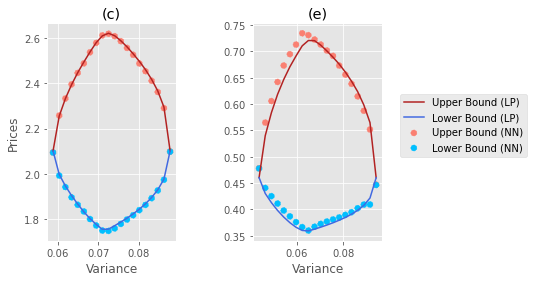

In [12]:
# (c)
def density(x):
    return (0.25)*(x>= -3)*(x<= -1)+(0.25)*(x>= 1)*(x<= 3)
v1,p1 = u_discretization_uniform_distribution(8,12,nr_support)
v2,p2 = u_discretization_uniform_distribution(5,15,nr_support)
plt.subplot(121)
plt.title("(c)")
plot_variance(v1,p1,v2,p2,payoff,plotxlabel = True, plotylabel = True)
# (e)
def density1(x):
    return 0.5*(x>= 2)*(x<=4)
def density2(x):
    return (1/3)*(x-1)*(x>= 1)*(x< 2)+ (1/3)*(x>= 2)*(x < 4)+(1/3)*(5-x)*(x>= 4)*(x<= 5)
v1,p1 = discretize_density(density1,min=2, max=4,N=10000)
v2,p2 = discretize_density(density2,min=1, max=5,N=10000)
plt.subplot(122)
plt.title("(e)")
plot_variance(v1,p1,v2,p2,payoff,plotxlabel = True, plotylabel = False)


plt.subplots_adjust(wspace=0.6,hspace = 0.6)
plt.legend(bbox_to_anchor=(1.1, 0.7), loc='best')
plt.savefig('./eps/variance_plots.eps', format='eps', bbox_inches='tight')
plt.show()